In [1]:
import sys
sys.path.append("..")
from preprocess.tile import tile_image
from smart_open import smart_open
import s3fs
from os import path, environ
import rasterio as rio
from re import match
import boto3

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from numpy.random import randint

from functools import partial

from concurrent import futures

import albumentations as A

environ['CURL_CA_BUNDLE']='/etc/ssl/certs/ca-certificates.crt'

sys.path.append("/home/jovyan/work/robosat.pink/")

from robosat_pink.datasets import *
from robosat_pink.tiles import *

from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# Test Paired Augmentation

In [2]:
transform = A.Compose([
    #A.ToFloat(p = 1),
    # A.RandomRotate90(p = 0.5),
    #A.RandomRotate90(p = 0.5),
    #A.RandomRotate90(p = 0.5), #these do something bad to the bands
#    A.Normalize(mean = mean, std = std, max_pixel_value = 1),
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.5),
#    A.ToFloat(p = 1, max_value = np.finfo(np.float64).max)
])

In [3]:
DATA_DIR = 's3://planet-snowcover-imagery/20180601_181448_0f32_3B_AnalyticMS_SR_clip_tiled'
MASK_DIR = "s3://planet-snowcover-snow/ASO_3M_SD_USCASJ_20180601_tiles_02"
all_tiles = SlippyMapTilesConcatenation(path = DATA_DIR, 
                                        target = MASK_DIR, 
                                        aws_profile = 'esip')

In [4]:
train_ids, test_ids = train_test_split(all_tiles.tiles)

In [5]:
train_tiles = SlippyMapTilesConcatenation(path = DATA_DIR, 
                                          target = MASK_DIR, 
                                          tiles = train_ids, 
                                          aws_profile = 'esip', 
                                          joint_transform = transform)
valid_tiles = SlippyMapTilesConcatenation(path = DATA_DIR, 
                                          target = MASK_DIR, 
                                          tiles = test_ids, 
                                          aws_profile = 'esip', 
                                          joint_transform = transform)

In [58]:
i = randint(0, len(valid_tiles))

In [69]:
d = valid_tiles[i]

Text(0.5, 1.0, 'mask')

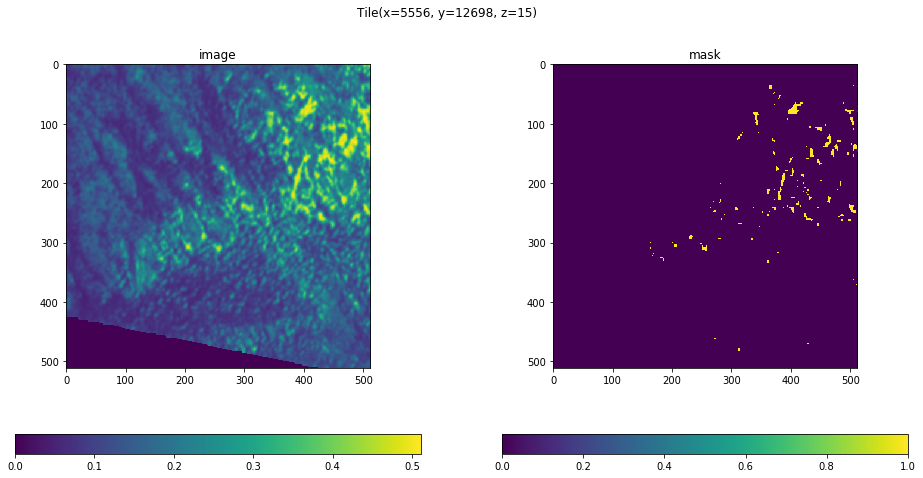

In [70]:

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
fig.suptitle(d[2])
#ax[0].imshow(np.rollaxis(data[0][[2,1,0], :, :], 0, 3))

cm = plt.cm.viridis
#im = ax[0].imshow(np.rollaxis(data[0][[3,2,1], :, :], 0, 3), interpolation='nearest')
im = ax[0].imshow(d[0][1, :, :], interpolation='nearest', cmap = cm)
fig.colorbar(im, ax=ax[0], orientation = 'horizontal')
ax[0].set_title("image")


im = ax[1].imshow(d[1].squeeze().astype('uint8'), interpolation='nearest', cmap = cm)
fig.colorbar(im, ax=ax[1], orientation = 'horizontal')
ax[1].set_title('mask')





In [162]:
np.rollaxis(xformd['image'], 2, 0).shape

(4, 512, 512)

In [176]:
d[0]

array([[[0.2482, 0.2985, 0.3653, ..., 0.1582, 0.1546, 0.1519],
        [0.2454, 0.2959, 0.3633, ..., 0.1555, 0.1506, 0.147 ],
        [0.2401, 0.2909, 0.3591, ..., 0.151 , 0.1446, 0.1398],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.2718, 0.3125, 0.367 , ..., 0.1846, 0.1808, 0.1779],
        [0.2661, 0.3085, 0.3655, ..., 0.182 , 0.1771, 0.1733],
        [0.2576, 0.3022, 0.362 , ..., 0.1776, 0.1713, 0.1665],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.2801, 0.3199, 0.3737, ..., 0.2182, 0.2142, 0.2111],
        [0.2757, 0.318 , 0.375 , ..., 0.2153, 0.2107, 0.2071],
        [0.2683, 0.3137, 0.3748, ..., 0.2104, 0.2051, 0.201 ],
        ...,
        [0. 